# Redes Neurais Recorrentes
## 10.1. Criar o código que simula o processo da imagem:

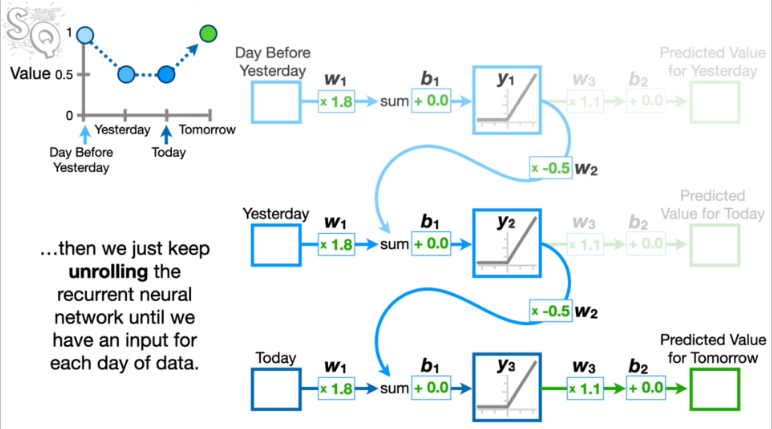

In [38]:
import torch

In [39]:
data = {'day before yesterday': 1, 'yesterday': 0.5, 'today': 0.5}
sequence = torch.tensor([[1.0], [0.5], [0.5]], dtype=torch.float32)

In [40]:
w1 = torch.tensor(1.8, requires_grad=True)
w2 = torch.tensor(-0.5,requires_grad=True)
w3 = torch.tensor(1.1, requires_grad=True)
b1 = torch.tensor(0.0, requires_grad=True)
b2 = torch.tensor(0.0, requires_grad=True)

activation = torch.nn.Softplus()

# Processo recorrente
hidden_state = torch.tensor(0.0, requires_grad=True)  # Estado oculto inicial

for i, x in enumerate(sequence):
    weighted_input = w1 * x
    summed = weighted_input + b1 + hidden_state
    activated = activation(summed)

    if i < len(sequence) - 1:
        output = w2 * activated
    else:
        # último passo
        output = w3 * activated + b2

    # novo estado oculto
    hidden_state = output
    print(f"Passo {i + 1}: Saída = {output.item()}")

print(f"Valor predito para 'tomorrow': {output.item()}")

Passo 1: Saída = -0.9764888286590576
Passo 2: Saída = -0.3278169333934784
Passo 3: Saída = 1.1215782165527344
Valor predito para 'tomorrow': 1.1215782165527344


## 10.2. [Apresentação sobre os principais problemas com redes neurais recorrentes](https://docs.google.com/presentation/d/1I86VYLqbPp8uoK4-1xH_whYBJUbh-05LAbhbX88tF18/edit?usp=sharing)

## 10.3.1. Explorando word embeddings: Treinamento de redes neurais com diferentes dimensões de embedding
O embedding de palavras são representações vetoriais densas de palavras, onde palavras semanticamente semelhantes têm vetores próximos no espaço de embeddings.

### Tarefa
1. Criar duas frases de treinamento, cada uma contendo três palavras (tokens).

2. Treinar duas redes neurais: uma com embeddings de dimensão 2 e outra com embeddings de dimensão 4.

3. Visualizar os embeddings aprendidos.

In [96]:
from torch import nn
import torch
import matplotlib.pyplot as plt

In [120]:
sentences = [
    ["gato", "persegue", "rato"], #
    ["cachorro", "brinca", "bola"]
]

In [121]:
# Criando o vocabulário
vocab = {word: idx for idx, word in enumerate(set(word for sentence in sentences for word in sentence))}
vocab_size = len(vocab)

# Convertendo as frases em índices
sentences_idx = [[vocab[word] for word in sentence] for sentence in sentences]

print("Vocabulário:", vocab)
print("Frases em índices:", sentences_idx)

Vocabulário: {'brinca': 0, 'persegue': 1, 'cachorro': 2, 'rato': 3, 'gato': 4, 'bola': 5}
Frases em índices: [[4, 1, 3], [2, 0, 5]]


In [122]:
# rede de embeding 2d
class EmbeddingNet2D(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(EmbeddingNet2D, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Camada de embedding
        self.fc = nn.Linear(embedding_dim, vocab_size)  # Camada fully connected

    def forward(self, x):
        embedded = self.embedding(x)  # Aplica a incorporação
        output = self.fc(embedded)  # Passa pela camada fully connected
        return output

In [123]:
# rede de embedding 4d
class EmbeddingNet4D(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(EmbeddingNet4D, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Camada de embedding
        self.fc = nn.Linear(embedding_dim, vocab_size)  # Camada fully connected

    def forward(self, x):
        embedded = self.embedding(x)  # Aplica o embedding
        output = self.fc(embedded)  # Passa pela camada fully connected
        return output

In [129]:
def train_model(model, sentences_idx, vocab_size, epochs=300, learning_rate=0.1):
    criterion = nn.CrossEntropyLoss()  # Função de perda
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # Otimizador

    for epoch in range(epochs):
        total_loss = 0
        for sentence in sentences_idx:
            # Convertendo a frase em tensores
            inputs = torch.tensor(sentence[:-1], dtype=torch.long)  # Entrada (todas as palavras, exceto a última)
            targets = torch.tensor(sentence[1:], dtype=torch.long)  # Saída esperada (todas as palavras, exceto a primeira)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass e otimização
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        if (epoch + 1) % 10 == 0:
            print(f"Época [{epoch + 1}/{epochs}], Perda: {total_loss / len(sentences_idx):.4f}")

In [130]:
for word, idx in vocab.items():
    if idx >= embeddings_2d_before.shape[0]:
        print(f"Índice {idx} para a palavra '{word}' está fora dos limites da matriz de embeddings.")

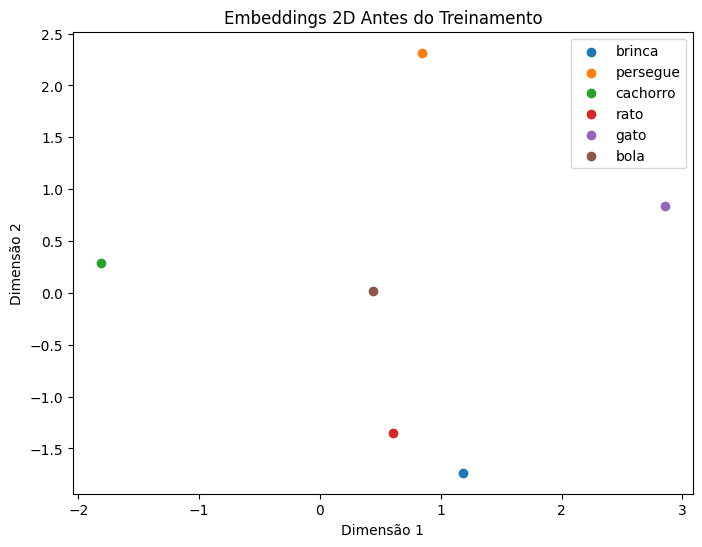

In [131]:
# embedding antes do treinamento
embeddings_2d_before = model_2d.embedding.weight.detach().numpy()

plt.figure(figsize=(8, 6))
for word, idx in vocab.items():
    plt.scatter(embeddings_2d_before[idx, 0], embeddings_2d_before[idx, 1], label=word)
plt.title("Embeddings 2D Antes do Treinamento")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.legend()
plt.show()

In [132]:
# treinamento rede 1
embedding_dim = 2
model_2d = EmbeddingNet2D(vocab_size, embedding_dim)
train_model(model_2d, sentences_idx, vocab_size)

Época [10/300], Perda: 1.5304
Época [20/300], Perda: 1.1477
Época [30/300], Perda: 0.7533
Época [40/300], Perda: 0.4461
Época [50/300], Perda: 0.2662
Época [60/300], Perda: 0.1701
Época [70/300], Perda: 0.1175
Época [80/300], Perda: 0.0865
Época [90/300], Perda: 0.0669
Época [100/300], Perda: 0.0538
Época [110/300], Perda: 0.0445
Época [120/300], Perda: 0.0377
Época [130/300], Perda: 0.0325
Época [140/300], Perda: 0.0284
Época [150/300], Perda: 0.0252
Época [160/300], Perda: 0.0225
Época [170/300], Perda: 0.0203
Época [180/300], Perda: 0.0185
Época [190/300], Perda: 0.0170
Época [200/300], Perda: 0.0156
Época [210/300], Perda: 0.0145
Época [220/300], Perda: 0.0134
Época [230/300], Perda: 0.0126
Época [240/300], Perda: 0.0118
Época [250/300], Perda: 0.0111
Época [260/300], Perda: 0.0104
Época [270/300], Perda: 0.0099
Época [280/300], Perda: 0.0093
Época [290/300], Perda: 0.0089
Época [300/300], Perda: 0.0084


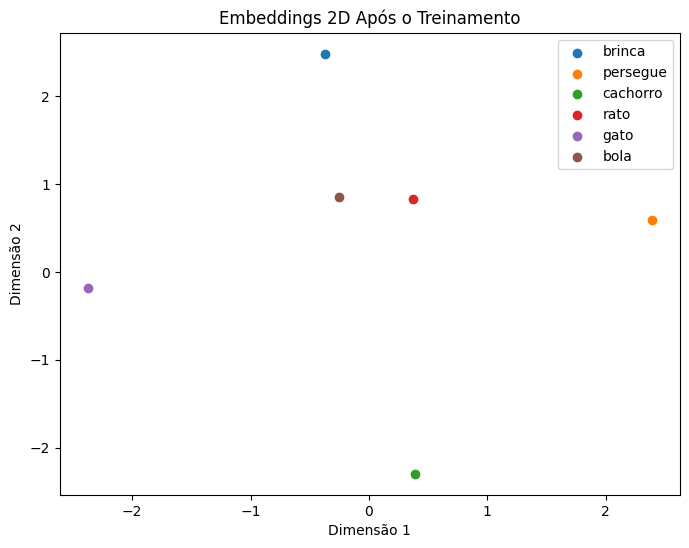

In [133]:
# embeddings após o treinamento
embeddings_2d_after = model_2d.embedding.weight.detach().numpy()

plt.figure(figsize=(8, 6))
for word, idx in vocab.items():
    plt.scatter(embeddings_2d_after[idx, 0], embeddings_2d_after[idx, 1], label=word)
plt.title("Embeddings 2D Após o Treinamento")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.legend()
plt.show()

In [134]:
# treinamento rede 2
embedding_dim = 4
model_4d = EmbeddingNet4D(vocab_size, embedding_dim)
train_model(model_4d, sentences_idx, vocab_size)

Época [10/300], Perda: 0.6654
Época [20/300], Perda: 0.4017
Época [30/300], Perda: 0.2630
Época [40/300], Perda: 0.1723
Época [50/300], Perda: 0.1163
Época [60/300], Perda: 0.0827
Época [70/300], Perda: 0.0620
Época [80/300], Perda: 0.0486
Época [90/300], Perda: 0.0394
Época [100/300], Perda: 0.0328
Época [110/300], Perda: 0.0279
Época [120/300], Perda: 0.0242
Época [130/300], Perda: 0.0212
Época [140/300], Perda: 0.0189
Época [150/300], Perda: 0.0169
Época [160/300], Perda: 0.0153
Época [170/300], Perda: 0.0140
Época [180/300], Perda: 0.0128
Época [190/300], Perda: 0.0118
Época [200/300], Perda: 0.0110
Época [210/300], Perda: 0.0102
Época [220/300], Perda: 0.0096
Época [230/300], Perda: 0.0090
Época [240/300], Perda: 0.0085
Época [250/300], Perda: 0.0080
Época [260/300], Perda: 0.0076
Época [270/300], Perda: 0.0072
Época [280/300], Perda: 0.0068
Época [290/300], Perda: 0.0065
Época [300/300], Perda: 0.0062


### Valores dos embeddings

In [135]:
# embeddings 2dim
embeddings_2d = model_2d.embedding.weight.detach().numpy()
print("Embeddings de Dimensão 2:")
for word, idx in vocab.items():
    print(f"{word}: {embeddings_2d[idx]}")

Embeddings de Dimensão 2:
brinca: [-0.36764777  2.4858415 ]
persegue: [2.3888733 0.5867676]
cachorro: [ 0.38930088 -2.2984543 ]
rato: [0.37105167 0.8339834 ]
gato: [-2.3736525  -0.18255526]
bola: [-0.25394103  0.8563539 ]


In [136]:
# embeddings 4d
embeddings_4d = model_4d.embedding.weight.detach().numpy()
print("embeddings de Dimensão 4:")
for word, idx in vocab.items():
    print(f"{word}: {embeddings_4d[idx]}")

embeddings de Dimensão 4:
brinca: [ 0.5938069  -2.1534564  -0.05795867  1.6560124 ]
persegue: [2.9296863  1.347998   0.72171384 0.25413987]
cachorro: [-0.20173362 -1.4049047  -0.3647679  -2.7087116 ]
rato: [ 0.4418483   0.17843518  0.01566117 -0.09876613]
gato: [-0.36970648  1.7727867   0.6080921  -1.481367  ]
bola: [ 2.7271423   1.3678265   1.7990599  -0.88511133]


## 10.3.2. Como a escolha do tamanho de embeddings afeta as representações aprendidas das palavras

**Informaçõs gerais**
* Nas classes EmbeddingNet (2 e 4D), o modelo usa uma camada de embedding ```nn.Embedding``` com dimensão 2 e 4. Isso significa que cada palavra será mapeada para um vetor 2D e 4D respectivamente nessas classes.
* Após o embedding, uma camada fully connected ```nn.Linear``` é usada para prever a próxima palavra na sequência.
* Antes do treinamento, os embedding são inicializados aleatoriamente.
* Posteriormente modelo é treinado para prever a próxima palavra em uma sequência. Durante o treinamento, os embedding são ajustados para capturar relações semânticas entre as palavras.

---
### Comparação entre os embeddings 2D e 4D

**Representação Espacial**

* Os embeddings 2D são fáceis de visualizar em um plano; palavras semanticamente semelhantes devem aparecer próximas umas das outras.

* Os embeddings de 4D têm mais dimensões para capturar informações, mas são mais difíceis de visualizar diretamente.

**Capacidade de Capturar Relações**

* Embeddings 2d podem ser limitados para capturar relações complexas entre palavras devido ao espaço reduzido.

* Embeddings 4d tem mais capacidade para capturar relações mais complexas entre palavras.

**Overfitting**

* Embeddings 2D são menos propensos a overfitting devido ao menor número de parâmetros.

* Embeddings 4D pode ser mais propensos a overfitting, especialmente com poucos dados.



## 10.4. [Apresentação sobre o artigo "SWE-Lancer: Can Frontier LLMs Earn $1 Million from Real-World Freelance Software Engineering?".](https://docs.google.com/presentation/d/18HwWM21oSX0pCIn5prKLsyTePfBEml4yQNgFaNBrFn8/edit?usp=sharing)
## 10.5. [Apresentação sobre o video "Introducing Helix"](https://docs.google.com/presentation/d/1wmAOKvF2inmmBTb4GqYlxHhC_SpHbMW5n5jquGsSxps/edit?usp=sharing)